<a href="https://colab.research.google.com/github/Nempickaxe/mini_projects/blob/master/Language_model_decoding_parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install transformers
!pip install ecco

     |████████████████████████████████| 22.2MB 1.4MB/s 
     |████████████████████████████████| 1.3MB 49.4MB/s 
     |████████████████████████████████| 1.2MB 44.4MB/s 
     |████████████████████████████████| 2.9MB 38.9MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: tokenizers 0.9.4
    Uninstalling tokenizers-0.9.4:
      Successfully uninstalled tokenizers-0.9.4
  Found existing installation: transformers 4.2.2
    Uninstalling transformers-4.2.2:
      Successfully uninstalled transformers-4.2.2


In [5]:
import ecco

lm = ecco.from_pretrained('gpt2', activations=True)

In [64]:
text = "The countries of the European Union"
output = lm.generate(text, generate=20, do_sample=True, top_k=30)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
output.layer_predictions(position=11, topk=30, layer=11)

Predictions for position 11


<IPython.core.display.Javascript object>

In [67]:
lm.tokenizer(['Japan Norway Canada'])

{'input_ids': [[16504, 15238, 3340]], 'attention_mask': [[1, 1, 1]]}

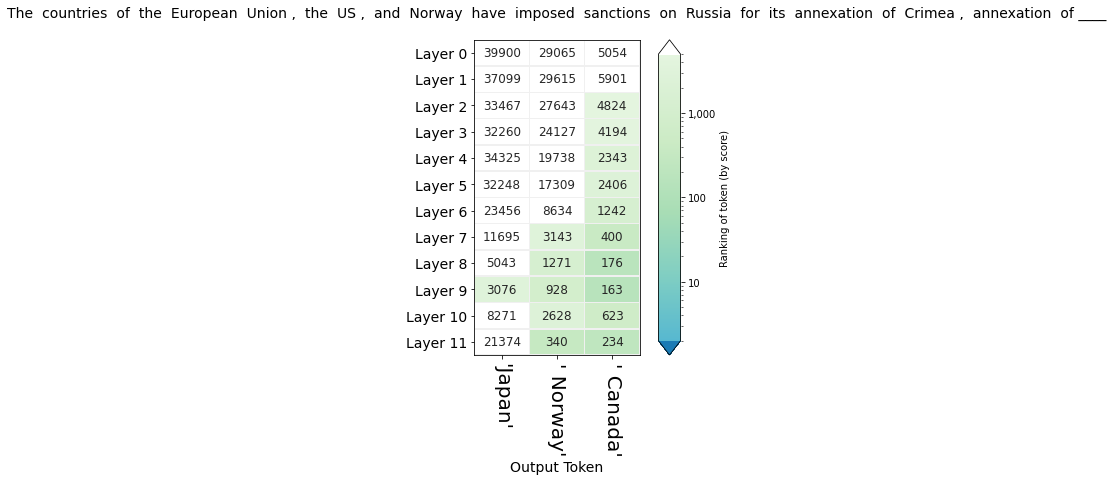

In [68]:
output.rankings_watch([16504, 15238, 3340], position=8)

/usr/local/lib/python3.6/dist-packages/ecco/output.py:331: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  token_id = torch.tensor(self.token_ids[self.n_input_tokens + j])


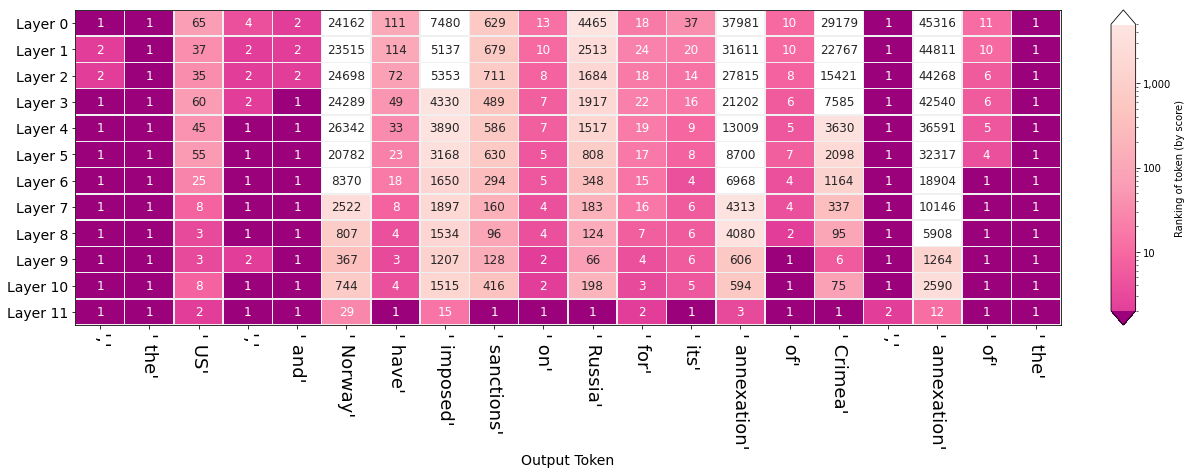

In [69]:
output.rankings()

In [40]:
output.saliency(style="detailed")

<IPython.core.display.Javascript object>

In [71]:
output.activations.shape

(12, 3072, 25)

In [14]:
nmf_1 = output.run_nmf(n_components=10)

In [15]:
nmf_1.explore()

<IPython.core.display.Javascript object>

In [4]:
import tensorflow as tf
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# add the EOS token as PAD token to avoid warnings
model = TFGPT2LMHeadModel.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)

All model checkpoint layers were used when initializing TFGPT2LMHeadModel.

All the layers of TFGPT2LMHeadModel were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


## Greedy

In [80]:
greedy_output = lm.generate('The orange is sweet', max_length=20, do_sample=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [76]:
greedy_output.layer_predictions(position=5, topk=30, layer=11)

Predictions for position 5


<IPython.core.display.Javascript object>

## Beam search

In [ ]:
beam_output = model.generate(
    input_ids, 
    max_length=50, 
    num_beams=5, 
    early_stopping=True
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
The orange is sweet, the red is bitter, and the green is bitter.

The orange is sweet, the red is bitter, and the green is bitter.

The orange is sweet, the red is bitter, and the green is


It's like talking to you in circles, you always say the same thing!!

In [ ]:
beam_output = model.generate(
    input_ids, 
    max_length=50, 
    num_beams=5, 
    no_repeat_ngram_size=2, 
    early_stopping=True
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
The orange is sweet, the red is sour, and the green is bitter.

I'm not sure if this is a good idea, or if it's just me, but I don't think I've ever heard of it before. I


# Sampling

In [83]:
sampling = lm.generate('The orange is sweet', max_length=20, do_sample=True, top_k=0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [87]:
sampling.layer_predictions(position=4, topk=30, layer=11)

Predictions for position 4


<IPython.core.display.Javascript object>

Make the distribution sharper using temperature

In [89]:
sampling_temp = lm.generate('The orange is sweet', max_length=20, do_sample=True, top_k=0, temperature=0.5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [95]:
sampling_temp.layer_predictions(position=6, topk=30, layer=11)

Predictions for position 6


<IPython.core.display.Javascript object>

## Top-K Sampling

In [91]:
topk = lm.generate('The orange is sweet', max_length=20, do_sample=True, top_k=30)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [96]:
topk.layer_predictions(position=6, topk=30, layer=11)

Predictions for position 6


<IPython.core.display.Javascript object>

## Top P sampling

In [101]:
topp = lm.generate('The orange is sweet', max_length=20, do_sample=True, top_p=0.2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [102]:
topp.layer_predictions(position=6, topk=30, layer=11)

Predictions for position 6


<IPython.core.display.Javascript object>